Датасет топовых песен 2018 с сервера spotify.

In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import scipy.stats as stats
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import pearsonr
%matplotlib inline

In [81]:
data = pd.read_csv('C:/Games/Test/top2018.csv')
data.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


Из данных мы имеем:
* **idSpotify** - id песни
* **name** - название песни
* **artists** - исполнитель
* **danceability** - означает насколько подходит музыка для танцев (основано на анализетаких музыкальных элементов как tempo, rhythm stability, beat strength, и overall regularity ) 0 означает что трек не подходит для танцев, 1 - что очень подходит.
* **energy** - значение от 0 до 1. Насколько интенсивная по энергетике. Например, death metal будет иметь 1 в качестве значения, музыка Баха - 0. Для анализа этой переменной используются такие данные, как dynamic range, perceived loudness, timbre, onset rate, и general entropy.
* **key** - ключ, означает высотный класс. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
* **loudness** - насколько громкая (децибелы). Гомкость усреднена по всему треку. Значения от  -60 до 0 db.
* **mode** -  показывает наклонение трека (мажор или минор), наклоне́ние в теории музыки — отличительные свойства терцового аккорда, звукоряда, тонального лада, которыми обусловливается их принадлежность к мажору или минору. Мажор представлен 1, минор 0.
* **speechiness** - обнаруживает, есть ли слова в песне. Чем больше слов в песне, чем больше значение к 1. Значение больше 0.66 означает, что трек полностью состоит из слов. Значения между 0.33 и 0.66 означает, что скорее всего трек содержит музыку + речь (рэп, например). Значение меньше 0.33 означает просто музыку. 
* **acousticness** - значение между 0 и 1. 1 - показывает насколько музыка акустична. 
* **instrumentalness** - показывает сколько в музыке вокала. "Ooh" и "aah" звуки считаются вокалом. Рэп или чтение стихов тоже вокал. Чем ближе значение к 1, тем больше вероятность, что трек не содержит вокала.  Значение больше 0.5 показывает инструментальный трек, но вероятность выше если значение приближается к 1.
* **liveness** - показывает присутствие аудитории в музыке (живое исполнение трека). Чем выше значение, тем больше вероятность, что трек исполнен вживую. Значение больше 0.8 показывает высокую вероятность живого исполнения. 
* **valence** - значение от 0 до 1 показывает позитивность трека. Треки с высоким значением valence означают позитивную музыку (счастливая, бодрящая), музыка с низким значением показывает грустную эмоциональность мелодии (злость, негатив). 
* **tempo** - темп музыки (скорость исполнения музыки) - бит в минуту (BPM). 
* **duration_ms** - сколько длится музыка в миллисекундах. 
* **time_signature** - тактовый размер в музыке — количественная характеристика тактового метра, указывающая число долей в такте


Посмотрим стандартные статистические параметры

In [4]:
 data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,417920.000000,5.00


Всего 100 песен. <br>Посмотрим, есть ли выбросы

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                100 non-null    object 
 1   name              100 non-null    object 
 2   artists           100 non-null    object 
 3   danceability      100 non-null    float64
 4   energy            100 non-null    float64
 5   key               100 non-null    float64
 6   loudness          100 non-null    float64
 7   mode              100 non-null    float64
 8   speechiness       100 non-null    float64
 9   acousticness      100 non-null    float64
 10  instrumentalness  100 non-null    float64
 11  liveness          100 non-null    float64
 12  valence           100 non-null    float64
 13  tempo             100 non-null    float64
 14  duration_ms       100 non-null    float64
 15  time_signature    100 non-null    float64
dtypes: float64(13), object(3)
memory usage: 12.6+

Создадим колонку, где миллисекунды представим ввиде минут

In [6]:
data['Duration_min'] = data['duration_ms'] / 60000

Посмотрим графики распределения величин

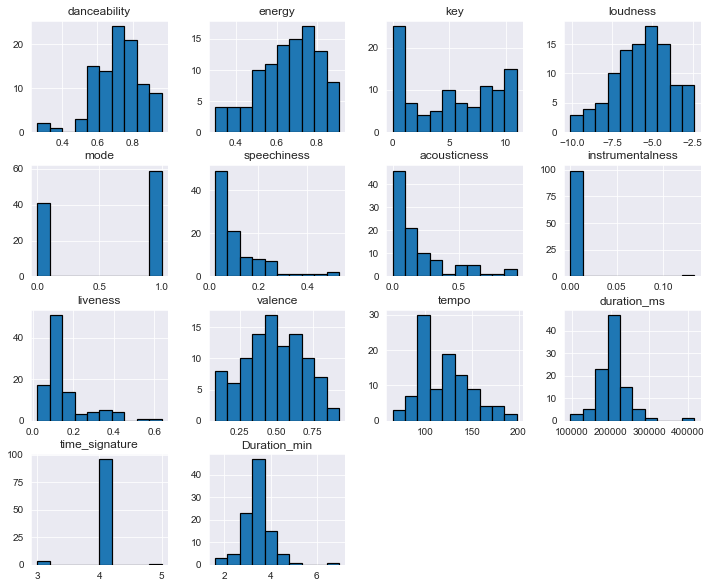

In [7]:
data.hist(edgecolor = 'black', linewidth = 1.2)
fig=plt.gcf()
fig.set_size_inches(12, 10)
plt.show()

Можно заметить, что Duration_min имеет точно такой же график, как и duration_ms. Так как легче хранить переменные меньшего размера, удалим колонку duration_ms.

In [8]:
data.drop(columns = 'duration_ms', inplace = True)

Построим матрицу корелляций

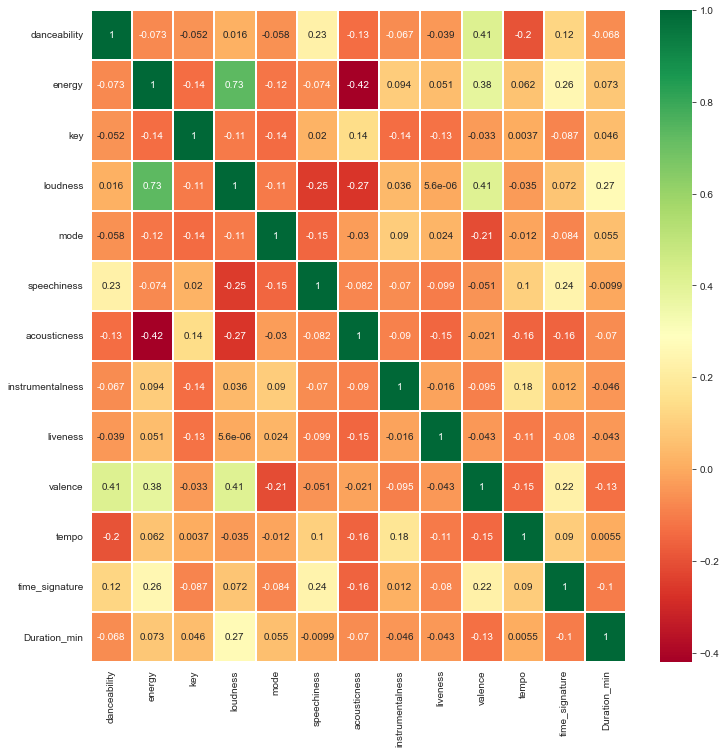

In [9]:
sns.heatmap(data.corr(), annot = True,cmap = 'RdYlGn', linewidths = 0.2) #data.corr() - correlation matrix
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.show()

In [10]:
matr = data.corr().round(2)
matr = np.array(matr)
matr = sorted(matr.reshape(matr.shape[0] ** 2))
matr[0:5]

[-0.42, -0.42, -0.27, -0.27, -0.25]

Минимальные значения корреляции = -0.42 и -0.25

Максимальные значения корреляции 0.73 и 0.41<br>
Можно заметить высокую корелляцию между такими данными как **loudness** и **energy**, максимальная отрицательная корреляция **acousticness** и **energy**. 

**Посмотрим Top-10 исполнителей**

In [11]:
data['artists'].value_counts().head(10)

Post Malone        6
XXXTENTACION       6
Drake              4
Marshmello         3
Ed Sheeran         3
Ariana Grande      2
The Weeknd         2
Imagine Dragons    2
Migos              2
Selena Gomez       2
Name: artists, dtype: int64

Проведем анализ переменной Dancebility: построим плотность распределения

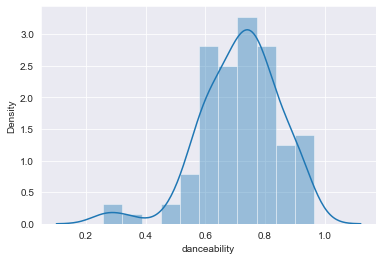

In [12]:
sns.set_style(style = 'darkgrid')
sns.distplot(data['danceability'], hist = True, kde = True)
plt.show()

Можно заметить, что распределение имеет нормальный вид, но чтобы сделать более детальный анализ, разделим данные на 3 класса:

*   больше чем 75% - очень танцевальный трек
*   между 50% и 74% - средне-танцевальный трек
*   меньше 50% - нетанцевальный трек

In [13]:
# создадим условия 
Vd = data['danceability'] >= 0.75
Ld = (data['danceability'] >= 0.5) & (data['danceability'] < 0.75)
Nd = data['danceability'] < 0.5
#создадим новую талицу Dance, где колонка Percent будет означать процент данных попавших в данную категорию
Dance=pd.DataFrame([Vd.sum(), Ld.sum(), Nd.sum()], columns = ['percent'],
                   index=['Very_dance', 'Regular', 'Instrumental'])

In [14]:
Dance.head()

,percent
Very_dance,43
Regular,53
Instrumental,4


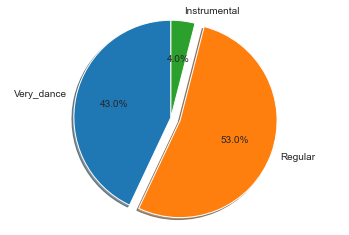

In [15]:
labels = 'Very_dance', 'Regular', 'Instrumental'
sizes = list(Dance['percent'])
explode = (0, 0.1, 0 )  #выделим вторую колонку, как максимальную

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
ax1.axis('equal')

plt.show()

То же самое проделаем с Energy значением:

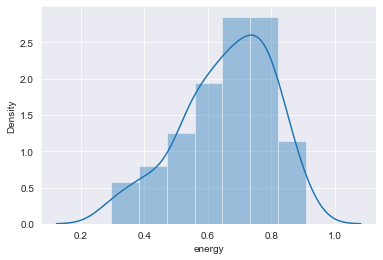

In [16]:
sns.distplot(data['energy'])
plt.show()

Разделим на 3 класса:


*   очень энергичная (>0.75)
*   среднеэнергичная (от 0.5 до 0.75)
*   малоэнергичная (менее 0.5)

In [17]:
Ve = data['energy'] >= 0.75
Re = (data['energy'] >= 0.5) & (data['energy'] < 0.75)
Le = data['energy'] < 0.5
Energy=pd.DataFrame([Ve.sum(), Re.sum(), Le.sum()], columns = ['percent'],
                   index = ['Very Energy', 'Regular Energy', 'Low Energy'])

In [18]:
Energy.head()

,percent
Very Energy,32
Regular Energy,55
Low Energy,13


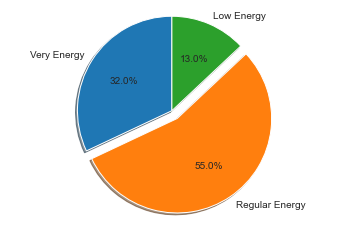

In [19]:
labels = 'Very Energy','Regular Energy','Low Energy'
sizes = list(Energy['percent'])
explode = (0, 0.1, 0 )  #выделим вторую колонку, как максимальную

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
ax1.axis('equal')

plt.show()

Добавим детальную корелляцию данных (по предыдущему анализу возьмем 'danceability','energy','valence','loudness','tempo')

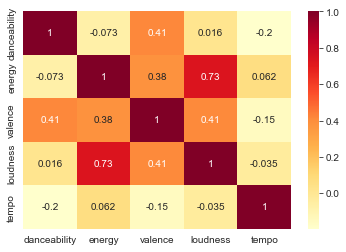

In [20]:
Correlation  =data[['danceability', 'energy', 'valence', 'loudness', 'tempo']]
sns.heatmap(Correlation.corr(), annot = True,cmap = "YlOrRd")
plt.show()

Данная матрица более детально показывает корреляцию между данными величинами.<br>
Посмотрим более детальную корелляцию energy и loudness.

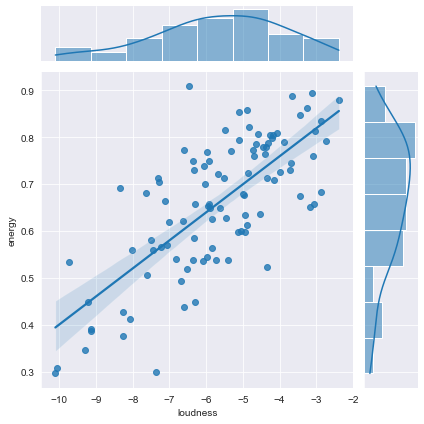

In [49]:
import warnings
warnings.filterwarnings("ignore")

graph = sns.jointplot(data = Correlation, y = 'energy', x = 'loudness', kind = 'reg')
plt.show()

Выводы: можно увидеть, что чем ближе значение громкости к 0, тем более вероятно, что трек будет иметь высокий ритм.

Посмотрим что мы можем сделать с темпом музыки. 

Выберем 5 основных класса по скоростям музыки:

* Length: очень медленная (20 bpm)
* Adagio:медленная и спокойная (66 to 76 bpm)
* Andante: умеренный темп (в характере шага) (76 to 108 bpm)
* Allegro: скорее чем andante. (110 to 168 bpm).
* Presto: очень быстро (168 to 200 bpm).

Cоздадим новую колонку Rhythm

In [144]:
data = pd.read_csv('C:/Games/Test/top2018.csv')
data['Rhythm'] = data['tempo']

data.loc[(data['tempo'] > 168), 'Rhythm'] = 'Presto'
data.loc[((data['tempo'] >= 110) & (data['tempo'] <= 168)), 'Rhythm'] = 'Allegro'
data.loc[((data['tempo'] >= 76) & (data['tempo'] < 110)), 'Rhythm'] = 'Andante'
data.loc[((data['tempo'] >= 66) & (data['tempo'] < 76)), 'Rhythm'] = 'Adagio'
data.loc[(data['tempo'] < 66), 'Rhythm'] = 'Length'

In [145]:
data[['tempo', 'Rhythm']].head()

,tempo,Rhythm
0,77.169,Andante
1,75.023,Adagio
2,159.847,Allegro
3,140.124,Allegro
4,91.030,Andante


Посмотрим распределение значений по скоростям звучания

In [146]:
data['Rhythm'].value_counts()

Allegro    47
Andante    44
Presto      7
Adagio      1
Length      1
Name: Rhythm, dtype: int64

Можно увидеть, что в топе-100 песен 2018 года мало спокойной музыки - 2, много быстрой - 46, умеренно быстрой - 44. 

Посмотрим **ТОП-10 танцевальных песен**

In [147]:
data[['name','artists', 'danceability', 'valence', 'tempo', 'Rhythm']].sort_values(by = 'danceability', ascending = False).head(10)

,name,artists,danceability,valence,tempo,Rhythm
91,Yes Indeed,Lil Baby,0.964,0.562,119.958,Allegro
55,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,0.931,0.376,125.978,Allegro
19,Look Alive (feat. Drake),BlocBoy JB,0.922,0.595,140.022,Allegro
18,Moonlight,XXXTENTACION,0.921,0.711,128.009,Allegro
61,Nonstop,Drake,0.912,0.422,154.983,Allegro
89,Bella,Wolfine,0.909,0.844,94.016,Andante
73,Walk It Talk It,Migos,0.909,0.406,145.905,Allegro
82,HUMBLE.,Kendrick Lamar,0.908,0.421,150.011,Allegro
21,Te Bot? - Remix,Nio Garcia,0.903,0.442,96.507,Andante
30,Taste (feat. Offset),Tyga,0.884,0.342,97.994,Andante


Проанализируем 4 самых популярных исполнителя, чтобы сделать выводы о вкусах населения

In [148]:
data['artists'].value_counts().head(4)

Post Malone     6
XXXTENTACION    6
Drake           4
Marshmello      3
Name: artists, dtype: int64

Посмотрим все песни исполнителя XXXTENTACION

In [149]:
XXXTENT = data[data['artists'] == 'XXXTENTACION']
XXXTENT[['name', 'danceability', 'energy', 'loudness', 'valence', 'tempo', 'Rhythm']]

,name,danceability,energy,loudness,valence,tempo,Rhythm
1,SAD!,0.740,0.613,-4.880,0.473,75.023,Adagio
18,Moonlight,0.921,0.537,-5.723,0.711,128.009,Allegro
28,Jocelyn Flores,0.872,0.391,-9.144,0.437,134.021,Allegro
38,changes,0.669,0.308,-10.068,0.520,64.934,Length
62,Fuck Love (feat. Trippie Redd),0.797,0.533,-9.740,0.329,131.036,Allegro
94,Everybody Dies In Their Nightmares,0.734,0.570,-7.066,0.689,129.953,Allegro


Можно заметить, что песнях XXXTENTACION  много ритма Allegro, поэтому высокий уровень танцевальности, скорее всего, исполнитель записывает  хип-хоп. Действительно, если проверить, XXXTENTACION - американский рэпер. 

Посмотрим исполнителя Post Malone

In [150]:
PMalone = data[data['artists'] == 'Post Malone']
PMalone[['name', 'danceability', 'energy', 'loudness', 'valence', 'tempo', 'Rhythm']]

,name,danceability,energy,loudness,valence,tempo,Rhythm
2,rockstar (feat. 21 Savage),0.587,0.535,-6.090,0.140,159.847,Allegro
3,Psycho (feat. Ty Dolla $ign),0.739,0.559,-8.011,0.439,140.124,Allegro
5,Better Now,0.680,0.563,-5.843,0.374,145.028,Allegro
32,I Fall Apart,0.556,0.538,-5.408,0.291,143.950,Allegro
75,Candy Paint,0.670,0.654,-5.944,0.438,180.024,Presto
76,Congratulations,0.630,0.804,-4.183,0.492,123.146,Allegro


Можно сделать вывод, что Post Malone также записывает быструю музыку Allegro, но танцевальных его/ее песен ниже, чем у XXXTENTACION. Смотрим  в википедию, и оказывается, данный исполнитель тоже рэпер. 

**Обработка колонки Keys**

In [125]:
data.key = data.key.map({0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 4: 'E', 5: 'F', 6: 'F#', 7: 'G', 8: 'G#', 9: 'A', 10: 'A#', 11: 'B'})

In [126]:
data.key.head()

0     G
1    G#
2     F
3    G#
4    C#
Name: key, dtype: object

Посмотрим самые используемые высотные классы

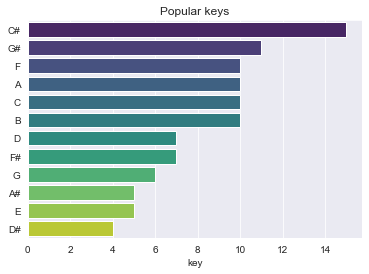

In [127]:
sns.set_style(style = 'darkgrid')
keys = data['key'].value_counts()
key_DF = pd.DataFrame(keys)
sns.barplot(x = key_DF.key, y = key_DF.index, palette = "viridis")
plt.title('Popular keys')
plt.show()

Посмотрим самые танцевальные треки по высотным значениям

In [128]:
data[['danceability', 'energy', 'valence', 'key']].groupby(by = 'key').mean().sort_values(by = 'danceability', ascending = False)

,danceability,energy,valence
key,,,
G,0.764167,0.581000,0.427833
C#,0.762000,0.695800,0.570533
A,0.760300,0.680000,0.563600
A#,0.740800,0.663000,0.501600
C,0.735400,0.679600,0.469300
D#,0.721500,0.669000,0.485150
F,0.716400,0.631200,0.527800
B,0.702000,0.623100,0.423670
D,0.701571,0.698857,0.373714


Можно увидеть что самые танцевальные треки имеют значение G и C#.

In [130]:
data[['danceability', 'energy', 'valence', 'key']].groupby(by = 'key').mean().sort_values(by = 'energy',ascending = False)

,danceability,energy,valence
key,,,
F#,0.636857,0.713857,0.370429
D,0.701571,0.698857,0.373714
C#,0.762000,0.695800,0.570533
A,0.760300,0.680000,0.563600
C,0.735400,0.679600,0.469300
D#,0.721500,0.669000,0.485150
A#,0.740800,0.663000,0.501600
E,0.605200,0.635800,0.436000
F,0.716400,0.631200,0.527800


По энергичности лидируют такие значения, как F#, D, C#.

Выводы:
По исходной базе данных можно сделать вывод, что есть сильная корелляция между значением energy и noise, с другой стороны, можно заметить, что основная причина, почему люди полюбили эти песни, связана со скоростью исполнения (основные tempo "allegro" и "andante", которые являются характеристиками жанров хип-хопа, регги, поп и рэп ).
